# Project Psyched: A Closer Look Into Reproducibility In Psychological Research

## Data Analysis & Visualization Script: Part 1 - P-value Trends
This script for data analysis and visualization after data has been scraped from TDM Studio. This script only utilizes Corpus 1.

Author: Yuyang Zhong (2020). This work is licensed under a [Creative Commons BY-NC-SA 4.0 International
License][cc-by].

![CC BY-NC-SA 4.0][cc-by-shield]

[cc-by]: http://creativecommons.org/licenses/by/4.0/
[cc-by-shield]: https://img.shields.io/badge/license-CC--BY--NC--SA%204.0-blue

#### Setup & Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy import stats

In [2]:
in_path = "../data/"
in_name = 'pvals_corpus1.csv'

In [3]:
df = pd.read_csv(in_path + in_name)
df.head()

,Unnamed: 0,P-Values,Year
0,614337945.xml,< .01,1987
1,614337945.xml,< .01,1987
2,614337945.xml,< .01,1987
3,614337945.xml,< .01,1987
4,614337945.xml,< .01,1987


#### Total number of p-values

In [4]:
df.dropna(inplace = True)
df.shape[0]

192896

#### Separate signs and values

In [5]:
df['P-Values'].apply(str)

df['Sign'] = df['P-Values'].apply(lambda x: re.search(r'([<|=|>])', x)[0])

df['p'] = df['P-Values'].apply(lambda x: re.search(r'(\.\d+)', x)[0])
df['p'] = df['p'].apply(float)

In [6]:
df.head()

,Unnamed: 0,P-Values,Year,Sign,p
0,614337945.xml,< .01,1987,<,0.01
1,614337945.xml,< .01,1987,<,0.01
2,614337945.xml,< .01,1987,<,0.01
3,614337945.xml,< .01,1987,<,0.01
4,614337945.xml,< .01,1987,<,0.01


#### Total P-Values included for visualization & analysis

In [7]:
p_vals_clean_10 = [float(i) for i in list(df['p']) if float(i) <= 0.10]
len(p_vals_clean_10)

168259

In [8]:
p_vals_clean_10_leq = [float(i) for i in list(df[(df['Sign'] == '<') | (df['Sign'] == '=')]['p']) if float(i) <= 0.10]
len(p_vals_clean_10_leq)

166041

#### Looking at only equal or less than

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


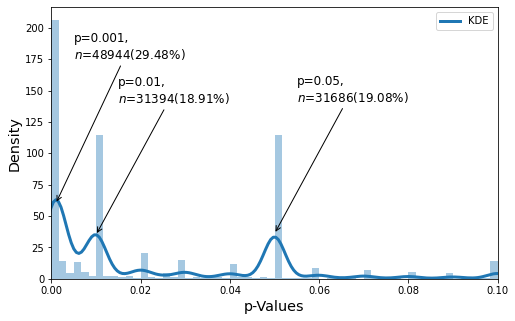

In [99]:
plt.figure(figsize=(8,5))
plt.xlim(0, 0.10)

ax = sns.distplot(p_vals_clean_10_leq, hist = True, bins = 60, norm_hist=False,
            kde_kws={"lw": 3, "label": "KDE"})

# Annotations
ax.annotate(f'p=0.001,\n$n$={p_vals_clean_10_leq.count(0.001)}' +
            f'({100*p_vals_clean_10_leq.count(0.001)/len(p_vals_clean_10_leq):.2f}%)',
            xy=(0.001, 60), xytext=(0.005, 175),
            arrowprops=dict(arrowstyle="->"),
            fontsize='large')

ax.annotate(f'p=0.01,\n$n$={p_vals_clean_10_leq.count(0.01)}' +
            f'({100*p_vals_clean_10_leq.count(0.01)/len(p_vals_clean_10_leq):.2f}%)',
            xy=(0.01, 35), xytext=(0.015, 140),
            arrowprops=dict(arrowstyle="->"),
            fontsize='large')

ax.annotate(f'p=0.05,\n$n$={p_vals_clean_10_leq.count(0.05)}' +
            f'({100*p_vals_clean_10_leq.count(0.05)/len(p_vals_clean_10_leq):.2f}%)',
            xy=(0.05, 36), xytext=(0.055, 141),
            arrowprops=dict(arrowstyle="->"),
            fontsize='large')

# plt.title("Distribution & Kernal Density Estimation for P-Values (All Years)")
ax.set_xlabel("p-Values", fontsize = 'x-large')
ax.set_ylabel("Density", fontsize = 'x-large')
plt.legend();

#### Year Published

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


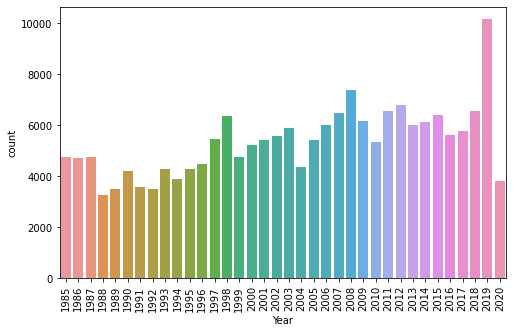

In [10]:
plt.figure(figsize=(8,5))
ax = sns.countplot(df['Year'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

## Proportion of p-values of interest
#### Grouping by 5-year periods

In [11]:
def year_group(y):
    y = int(y)
    if y <= 1990:
        return '1985-1990'
    if y <= 1995:
        return '1991-1995'
    if y <= 2000:
        return '1996-2000'
    if y <= 2005:
        return '2001-2005'
    if y <= 2010:
        return '2006-2010'
    if y <= 2015:
        return '2011-2015'
    else:
        return '2016-2020'
    
df['Year Group'] = df['Year'].apply(year_group)
df_year_group = df.groupby('Year Group')['p'].apply(list).to_frame()

In [12]:
def prop_001(lst):
    return (lst.count(0.001)) / len(lst)

def prop_01(lst):
    return (lst.count(0.01)) / len(lst)

def prop_05(lst):
    return (lst.count(0.05)) / len(lst)

df_year_group['0.001'] = df_year_group['p'].apply(prop_001)
df_year_group['0.01'] = df_year_group['p'].apply(prop_01)
df_year_group['0.05'] = df_year_group['p'].apply(prop_05)

In [13]:
df_year_group

,p,0.001,0.01,0.05
Year Group,,,,
1985-1990,"[0.01, 0.01, 0.01, 0.01, 0.01, 0.05, 0.05, 0.0...",0.223122,0.192721,0.216732
1991-1995,"[0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.0...",0.237924,0.182708,0.194591
1996-2000,"[0.05, 0.001, 0.001, 0.02, 0.001, 0.02, 0.04, ...",0.233889,0.199688,0.220902
2001-2005,"[0.0048, 0.382, 0.001, 0.001, 0.025, 0.382, 0....",0.208519,0.228262,0.218896
2006-2010,"[0.05, 0.01, 0.01, 0.11, 0.08, 0.89, 0.05, 0.0...",0.238822,0.168297,0.188916
2011-2015,"[1e-05, 0.27, 0.63, 0.13, 0.0003, 0.86, 0.48, ...",0.257860,0.133252,0.118251
2016-2020,"[0.0002, 0.001, 0.0002, 0.001, 0.001, 0.022, 0...",0.352895,0.067051,0.064920


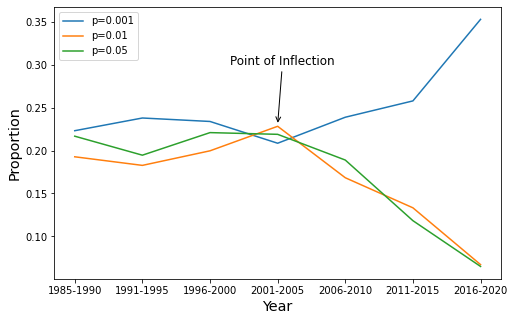

In [14]:
plt.figure(figsize=(8,5))

for p in ['0.001', '0.01', '0.05']:
    ax=sns.lineplot(x=df_year_group.index, y=p, data=df_year_group, label=f'p={p}')
    
# Annotations
ax.annotate('Point of Inflection',
            xy=(3, 0.23), xytext=(2.3, 0.3),
            arrowprops=dict(arrowstyle="->"),
            fontsize='large')

ax.set_xlabel("Year", fontsize = 'x-large')
ax.set_ylabel("Proportion", fontsize = 'x-large');
plt.legend();

#### Grouping before and after 2015

In [15]:
def year_group_before_after(y):
    y = int(y)
    if y <= 2015:
        return '1985-2015'
    else:
        return '2016-2020'
    
df['Year Group 2'] = df['Year'].apply(year_group_before_after)
df_year_group_ba = df.groupby('Year Group 2')['p'].apply(list).to_frame()

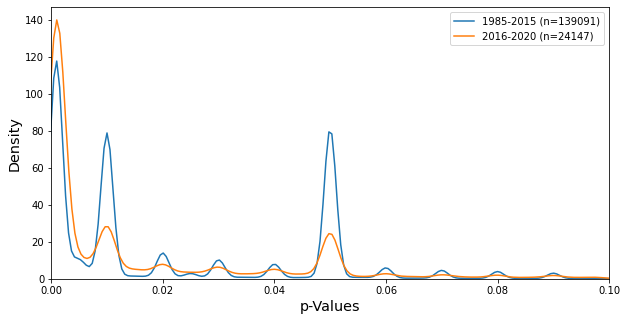

In [88]:
plt.figure(figsize=(10,5))
plt.xlim(0, 0.10)
for i in df_year_group_ba.index:
    vals = df_year_group_ba.loc[i][0]
    vals = [float(y) for y in vals if float(y) < 0.10]
    ax = sns.kdeplot(vals, bw_adjust=.5, label = f'{i} (n={len(vals)})')

# plt.title("Distribution & Kernal Density Estimation for P-Values (All Years)")
ax.set_xlabel("p-Values", fontsize = 'x-large')
ax.set_ylabel("Density", fontsize = 'x-large')
plt.legend();

## Proportion of Significant p-values in an article, over time

In [17]:
df_year = df.groupby('Year')['p'].apply(list).to_frame()

In [18]:
def prop_sig(lst):
    if len(lst) == 0:
        return 0
    return sum(np.array(lst) <= 0.05) / len(lst)

df_year['Prop Sig'] = df_year['p'].apply(prop_sig)
df_year.head()

,p,Prop Sig
Year,,
1985,"[0.001, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0....",0.867523
1986,"[0.05, 0.001, 0.05, 0.05, 0.01, 0.01, 0.001, 0...",0.861587
1987,"[0.01, 0.01, 0.01, 0.01, 0.01, 0.05, 0.05, 0.0...",0.871233
1988,"[0.001, 0.001, 0.001, 0.001, 0.001, 0.002, 0.0...",0.858369
1989,"[0.0001, 0.001, 0.01, 0.001, 0.001, 0.002, 0.0...",0.854691


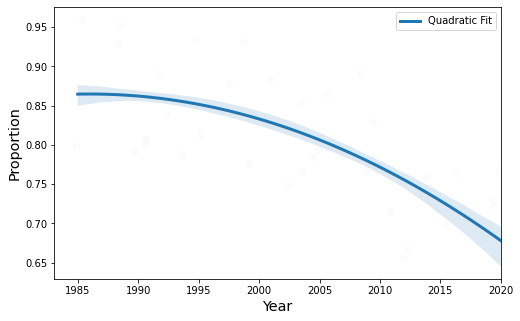

In [19]:
plt.figure(figsize=(8,5))
ax=sns.regplot(x=df_year.index, y='Prop Sig', data=df_year, order=2, 
               x_jitter=1.5,
               y_jitter=0.1,
               scatter_kws={'alpha': 0.02},
               line_kws={"lw": 3, 'label':'Quadratic Fit'})

ax.set_xlabel("Year", fontsize = 'x-large')
ax.set_ylabel("Proportion", fontsize = 'x-large')
plt.legend();

## Time Lapse for p-value distribution

<AxesSubplot:ylabel='Density'>

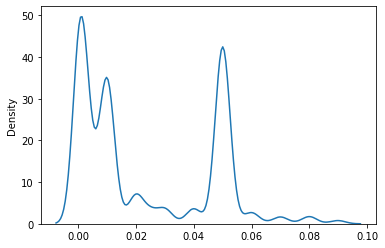

In [85]:
sns.kdeplot(val1985, bw_adjust=.6, label='1985')

In [51]:
import matplotlib.animation as animation

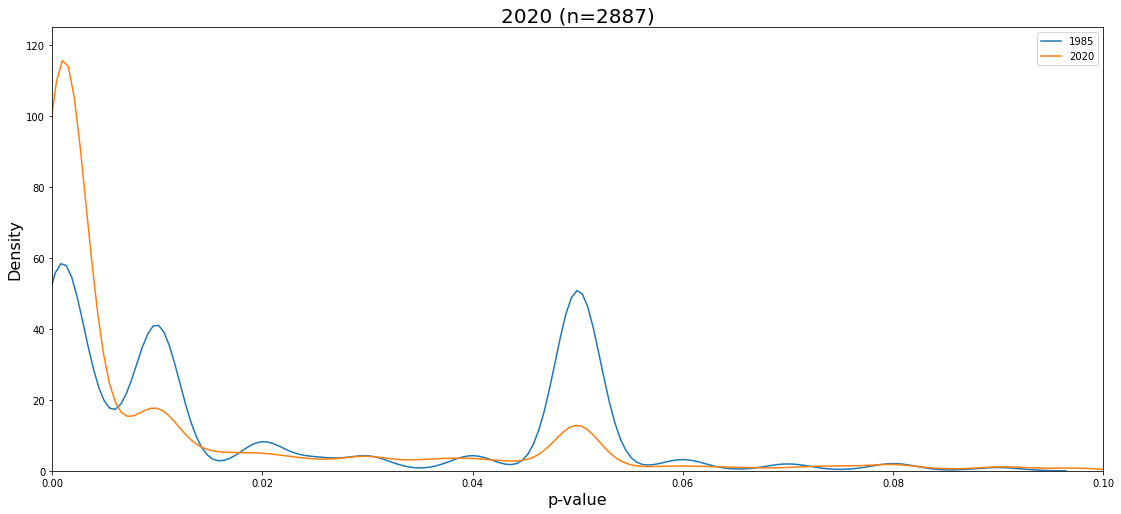

In [106]:
iterations = list(df_year.index[1:]) + [2020,2020,2020,2020,2020]

fig, ax = plt.subplots(figsize=(20,8))
fig.subplots_adjust(top = 0.88, right = 0.85, bottom = 0.11, left = 0.12)

val1985 = df_year.loc[1985,]['p']
val1985 = [float(y) for y in val1985 if float(y) < 0.10]

def update(i):
    ax.cla()
    vals = df_year.loc[iterations[i],]['p']
    vals = [float(y) for y in vals if float(y) < 0.10]
    
    sns.kdeplot(val1985, bw_adjust=.5, label='1985')
    sns.kdeplot(vals, bw_adjust=.5, label=iterations[i])
    ax.set_title(f'{iterations[i]} (n={len(vals)})', fontsize = 20)
    ax.set_xlabel('p-value', fontsize = 16)
    ax.set_ylabel('Density', fontsize = 16)
    ax.set_xlim(0, 0.1)
    ax.set_ylim(0, 125)
    ax.legend();

ani = animation.FuncAnimation(fig, update, frames = len(iterations))

writergif = animation.PillowWriter(fps=2)
ani.save('pval_time_lapse.gif', writer=writergif)

plt.show();